# Creating an executive presentation

- Let's use the kaggle 'Superstore Sales Dataset' available at:
    - https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
<br><br>
### What do we want to answer?
- How were **sales** during this period?
- What was the **best selling category**?
- What was the **best-selling item**?

### 1. Importing and Viewing the database
- Base: "database.csv"

In [7]:
# Importing the libraries and database
import pandas as pd
base = pd.read_csv("Superstore_Dataset.csv") 

### 2. Understanding and treating the database

In [8]:
# Viewing database information
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

**Only the postal code has null values, so we can see which lines don't have this value**

In [9]:
# Checking records with an empty Postal Code
base.loc[base["Postal Code"].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


**All the records without a postal code are from the city of Burlington, Vermont.**
<br>
**I wonder if any records from that city have a postal code.**

In [10]:
# Checking if there is any record of Burlington, Vermont with Postal Code
base.loc[(base.City == 'Burlington') & (base.State == 'Vermont') & (base['Postal Code'].notnull())]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


**We can go directly to google to find this information.**

![google_screen_shot.png](google_screen_shot.png)

In [11]:
# Updating this information
base.loc[(base.City == 'Burlington') & (base.State == 'Vermont') & (base['Postal Code'].isnull()), "Postal Code"] = 5401

In [12]:
# Viewing base information again
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [13]:
# Checking if there are any null values left
base.loc[(base.City == 'Burlington') & (base.State == 'Vermont') & (base['Postal Code'].isnull())]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


- If the 'Postal Code' column wasn't necessary, we could solve this problem by using drop.

In [14]:
# Example
base2 = base.drop('Postal Code', axis=1)

In [15]:
base2.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


### 3. <font color="blue"> How were sales during this period? </font>
Here we have two questions to think about:
- **Which <font color="blue">columns</font> are we going to use?**
    - We can check the sale in the "Sales" column.
    - The period we can use the "Order Date" column, but we need to understand this column better
- **Which <font color="blue">period</font> do we want to display?**

In [16]:
# To understand the date, we can see which period we're talking about
base['Order Date'].min()

'01/01/2018'

**<font color="red">WARNING:</font> If the date column is in text format and not as a date, the sorting will be by text and not by date!**

**We can convert a column to a date using pandas's to_datetime**
<br><br>
base["column"] = pd.**to_datetime(**base["column"]**)**
- In datetime, if you only have the date, the time would be 00:00:00
- If we only want to consider the date, we can use **.date** from the **datetime** library.

In [17]:
import datetime as dt

In [18]:
base.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


In [19]:
# Converting date columns to datetime
base['Order Date'] = pd.to_datetime(base['Order Date'])
base['Ship Date'] = pd.to_datetime(base['Ship Date'])

C:\Users\Guiga\AppData\Local\Temp\ipykernel_14564\2739536866.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  base['Order Date'] = pd.to_datetime(base['Order Date'])
C:\Users\Guiga\AppData\Local\Temp\ipykernel_14564\2739536866.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  base['Ship Date'] = pd.to_datetime(base['Ship Date'])


In [20]:
# To understand the date, we can see which period we're talking about
base['Order Date'].min()

Timestamp('2015-01-02 00:00:00')

In [21]:
# Searching for the maximum date
base['Order Date'].max()

Timestamp('2018-12-30 00:00:00')

- We're talking about 4 years of analysis, starting in Jan/2015 and going up to Dec/2018

#### Since we're talking about a long period of years, we can start visualizing the years
- To do this, we can use the **.year** from the datetime library to create a new column with just the year of that base

# Sales per year

In [22]:
# Creating a column with the year
base['year'] = base['Order Date'].dt.year

In [23]:
base.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,year
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017


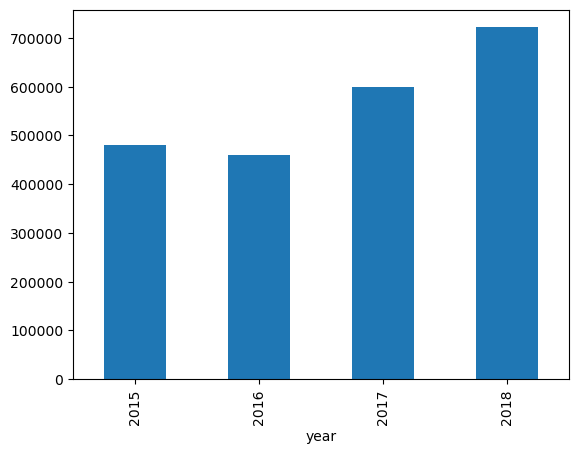

In [24]:
# Using this column in the group by and creating a bar plot
base.groupby('year')['Sales'].sum().plot.bar();

## Improving the look of this graphic
- https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py
- Color suggestion: '#84ba5b'

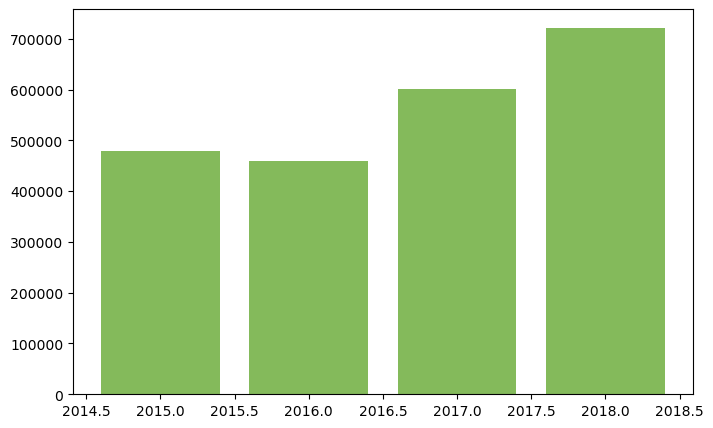

In [26]:
# Creating a graph with the matplotlib library and using groupby
import matplotlib.pyplot as plt
import numpy as np

# creating the variables
x = base.groupby('year')['Sales'].sum().index
y = base.groupby('year')['Sales'].sum().values

# plot
fig, ax = plt.subplots(figsize = (8,5))

ax.bar(x, y, linewidth=2.0, color='#84ba5b')

plt.show()


**Adding the title and improving the axis texts**
- Let's add the title and improve the x-axis
    - The '.set_title' will allow you to add titles and adjust the parameters of these titles
        - fontsize: Font size
        - fontweight: Font thickness
        - color: Font color
    - xaxis.set_ticks' will define the values shown on the x-axis
    - The '.tick_params(axis='x')' will adjust the parameter of the x-axis
        - labelsize: label size

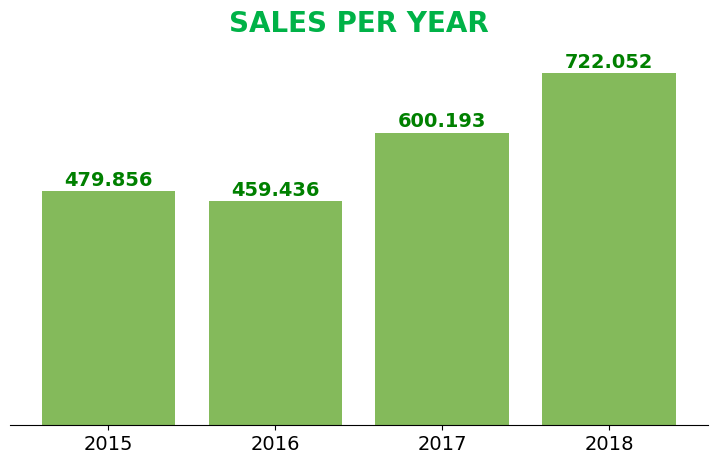

In [31]:
# Creating a graph with the matplotlib library and using groupby
import matplotlib.pyplot as plt
import numpy as np

# creating the variables
# Values we will use to create our graph

sum_year = base.groupby("year")["Sales"].sum()

x = sum_year.index
y = sum_year.values

# plot
fig, ax = plt.subplots(figsize = (9,5)) # Figure size

ax.bar(x, y, linewidth=2.0, color='#84ba5b') # Color of the bars

ax.set_title("SALES PER YEAR", # Graphic title
             fontsize=20, # Font size
             fontweight='bold', # Font thickness
             color='#00b247' # Font color
            )

ax.xaxis.set_ticks([2015,2016,2017,2018]) # Adjusting the values of x
ax.tick_params(axis='x',labelsize=14) # Improving the look of the x-axis

# Annotate will allow us to label the data
for i in np.arange(0,4):
    ax.annotate('{:,.0f}'.format(sum_year.values[i]).replace(',', '.'), # Values that will be shown as labels, already formatted
                (sum_year.index[i],sum_year.values[i]), # Position (x,y where these values will be)
                ha="center",  # Horizontal text alignment
                va="top", # Vertical text alignment
                xytext=(0,+15), # Displacement from the point where the text would have been
                textcoords="offset points",  # Coordinate system that xytext will reference (in this case it will be in points, not pixels)
                fontsize=14, # Label font size
                fontweight='bold', # Label font thickness
                color="green" # Label color
            )
        
ax.set_yticks(np.array([0,790000])) # Reducing the size of the bars so as not to cut off the label
ax.yaxis.set_visible(False) # Removing the values from the y-axis

ax.spines['top'].set_visible(False) # Removing the dashes from the graph
ax.spines['left'].set_visible(False) # Removing the dashes from the graph
ax.spines['right'].set_visible(False) # Removing the dashes from the graph

plt.show()


# Sales per month

In [27]:
import numpy as np

#### We can show this vision for months
- To do this, we can use the **.month** from the datetime library to create a new column with just the month of that base month

In [35]:
# Creating a column with the month
base['month'] = base['Order Date'].dt.month

In [39]:
# Groupby now by month and year
sum_month = base.groupby(['year', 'month'])['Sales'].sum()

In [44]:
# Verificando os valores gerados
sum_month = pd.DataFrame(base.groupby(['year', 'month'])['Sales'].sum())
display(sum_month)

Sales
year month            
2015 1      28828.2540
     2      12588.4840
     3      54027.6920
     4      24710.0160
     5      29520.4900
     6      29181.3346
     7      35194.5580
     8      37349.2655
     9      65956.3998
     10     34561.9470
     11     64369.4565
     12     63568.3107
2016 1      29347.3864
     2      20728.3520
     3      34489.6776
     4      38056.9685
     5      30761.5585
     6      28515.9082
     7      28573.3100
     8      49076.9300
     9      65352.9970
     10     31631.8890
     11     50009.1450
     12     52891.8832
2017 1      38048.1840
     2      48907.5900
     3      48990.1410
     4      42368.0480
     5      64836.2518
     6      37424.6810
     7      41761.9430
     8      45766.8144
     9      40692.3063
     10     52156.9580
     11     66392.5470
     12     72847.0855
2018 1      59767.0910
     2      48928.8334
     3      74748.6238
     4      37849.2156
     5      40882.4464
     6      46912.8475
     7      53942.7755
     8      75408.7840
     9      73153.3640
     10     65501.1622
     11     87997.6400
     12     56959.2358

**With <font color="blue">.reset_index()</font> we can turn the indexes into columns and then apply all the properties we know from the DataFrame**

In [45]:
# Let's turn the indexes into columns
sum_month = sum_month.reset_index()

In [46]:
# Visualizando a base novamente
sum_month

,year,month,Sales
0,2015,1,28828.2540
1,2015,2,12588.4840
2,2015,3,54027.6920
3,2015,4,24710.0160
4,2015,5,29520.4900
5,2015,6,29181.3346
6,2015,7,35194.5580
7,2015,8,37349.2655
8,2015,9,65956.3998
9,2015,10,34561.9470


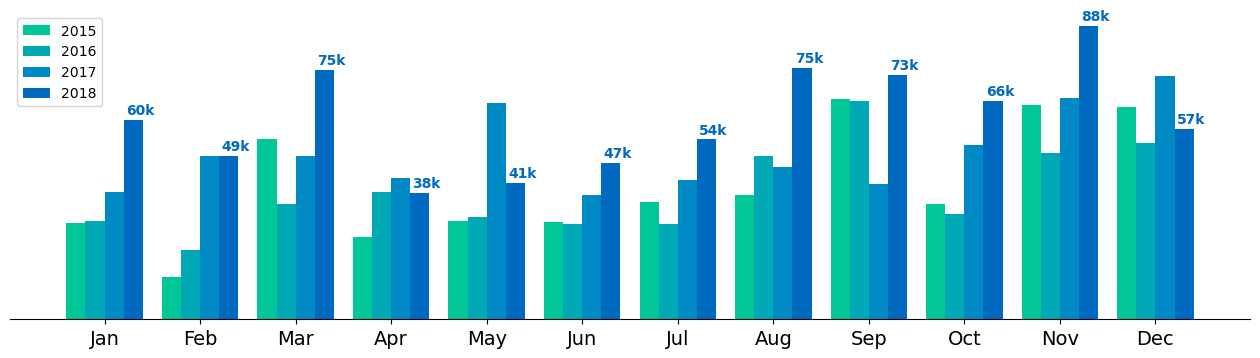

In [55]:
fig,ax = plt.subplots(
            figsize = (16,4) # Figure size
        )

wid = 0.2 # Size of the bars

ax.bar(sum_month[sum_month.year == 2015].month.values-wid-wid/2, # Adjusting the position of the bars
       sum_month[sum_month.year == 2015].Sales.values,
       color="#00c698", # Color of the bars
       label=2015, # Data label
       width=wid # Bar width
      )
ax.bar(sum_month[sum_month.year == 2016].month.values-wid/2, # Adjusting the position of the bars
       sum_month[sum_month.year == 2016].Sales.values,
       color="#00a9b5", 
       label=2016,
       width=wid 
      )

# Adding the rest of the bars
ax.bar(sum_month[sum_month.year == 2017].month.values+wid/2, # Adjusting the position of the bars
       sum_month[sum_month.year == 2017].Sales.values,
       color="#008ac5", 
       label=2017,
       width=wid 
      )
ax.bar(sum_month[sum_month.year == 2018].month.values+wid+wid/2, # Adjusting the position of the bars
       sum_month[sum_month.year == 2018].Sales.values,
       color="#0069c0", 
       label=2018,
       width=wid 
      )

# Adding the data label for 2018
for i in np.arange(0,12):
    ax.annotate('{:,.0f}k'.format(sum_month[sum_month.year == 2018].Sales.values[i]/1000), # Values that will be shown as labels, already formatted
                (sum_month[sum_month.year == 2018].month.values[i]+wid+wid/2,sum_month[sum_month.year == 2018].Sales.values[i]), # Position (x,y where these values will be)
                ha="center",  # Horizontal text alignment
                va="top", # Vertical text alignment
                xytext=(5,12), # Displacement from the point where the text would have been
                textcoords="offset points",  # Coordinate system that xytext will reference (in this case it will be in points, not pixels)
                fontsize=10, # Label font size
                fontweight='bold', # Label font thickness
                color="#0069c0" # Label color
            )
    
ax.yaxis.set_visible(False) # Removing the values from the y-axis

ax.spines['top'].set_visible(False) # Removing the dashes from the graph
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_ticks(np.arange(1,13)) # Adjusting the values of x
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax.tick_params(axis='x',labelsize=14) # Improving the look of the x-axis

ax.legend()
    
plt.show()